##### Name : Nishant Jain
##### Enrollment Number: SAU/IMTECH/2024/03
##### Course: Fundamentals of Machine Learning
##### Programme : Integrated M.Tech

# 1. Importing Libraries and Loading Dataset
Import the necessary Python libraries for data analysis and visualization. Then, load the diabetes dataset and remove any duplicate entries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.drop_duplicates(inplace=True)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Exploring the Dataset
Get general information about the diabetes dataset, including its structure, shape, columns, and class distribution.

In [3]:
# Getting details of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Checking the shape of data
dataset.shape

(768, 9)

In [5]:
# Check number of Columns
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Check the count of each species
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 4. Data Balance
Verify if the dataset is balanced by comparing the number of instances in each class.

In [7]:
outcome = dataset['Outcome']


# 5. Data Visualization
Visualize the relationships between features and the target variable using scatter plots and pair plots.

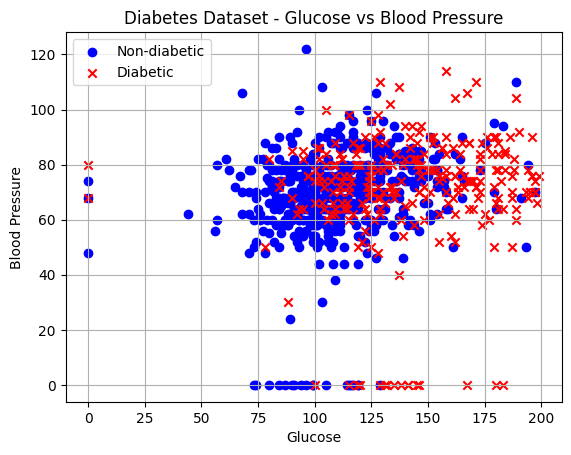

In [8]:
x1 = dataset['Glucose']
y1 = dataset['BloodPressure']

outcome = dataset['Outcome']


plt.scatter(x1[outcome == 0], y1[outcome == 0], color='b', label='Non-diabetic', marker='o')
plt.scatter(x1[outcome == 1], y1[outcome == 1], color='r', label='Diabetic', marker='x')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Diabetes Dataset - Glucose vs Blood Pressure')
plt.legend()
plt.grid()  
plt.show()

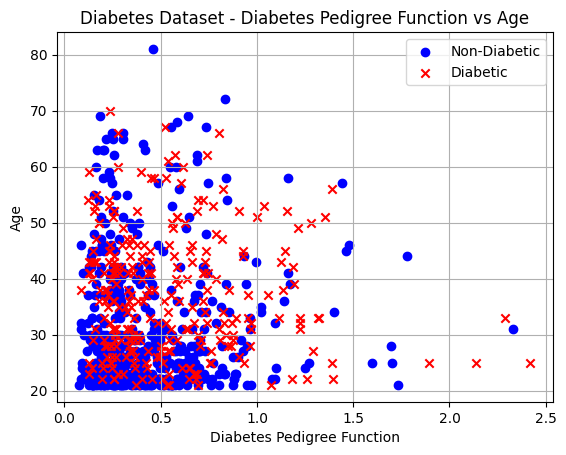

In [9]:
x2 = dataset['DiabetesPedigreeFunction']
y2 = dataset['Age']
plt.scatter(x2[outcome == 0], y2[outcome == 0], color='b', label='Non-Diabetic', marker='o')
plt.scatter(x2[outcome == 1], y2[outcome == 1], color='r', label='Diabetic', marker='x')
plt.xlabel('Diabetes Pedigree Function')  
plt.ylabel('Age')
plt.title('Diabetes Dataset - Diabetes Pedigree Function vs Age')
plt.legend()
plt.grid()
plt.show()

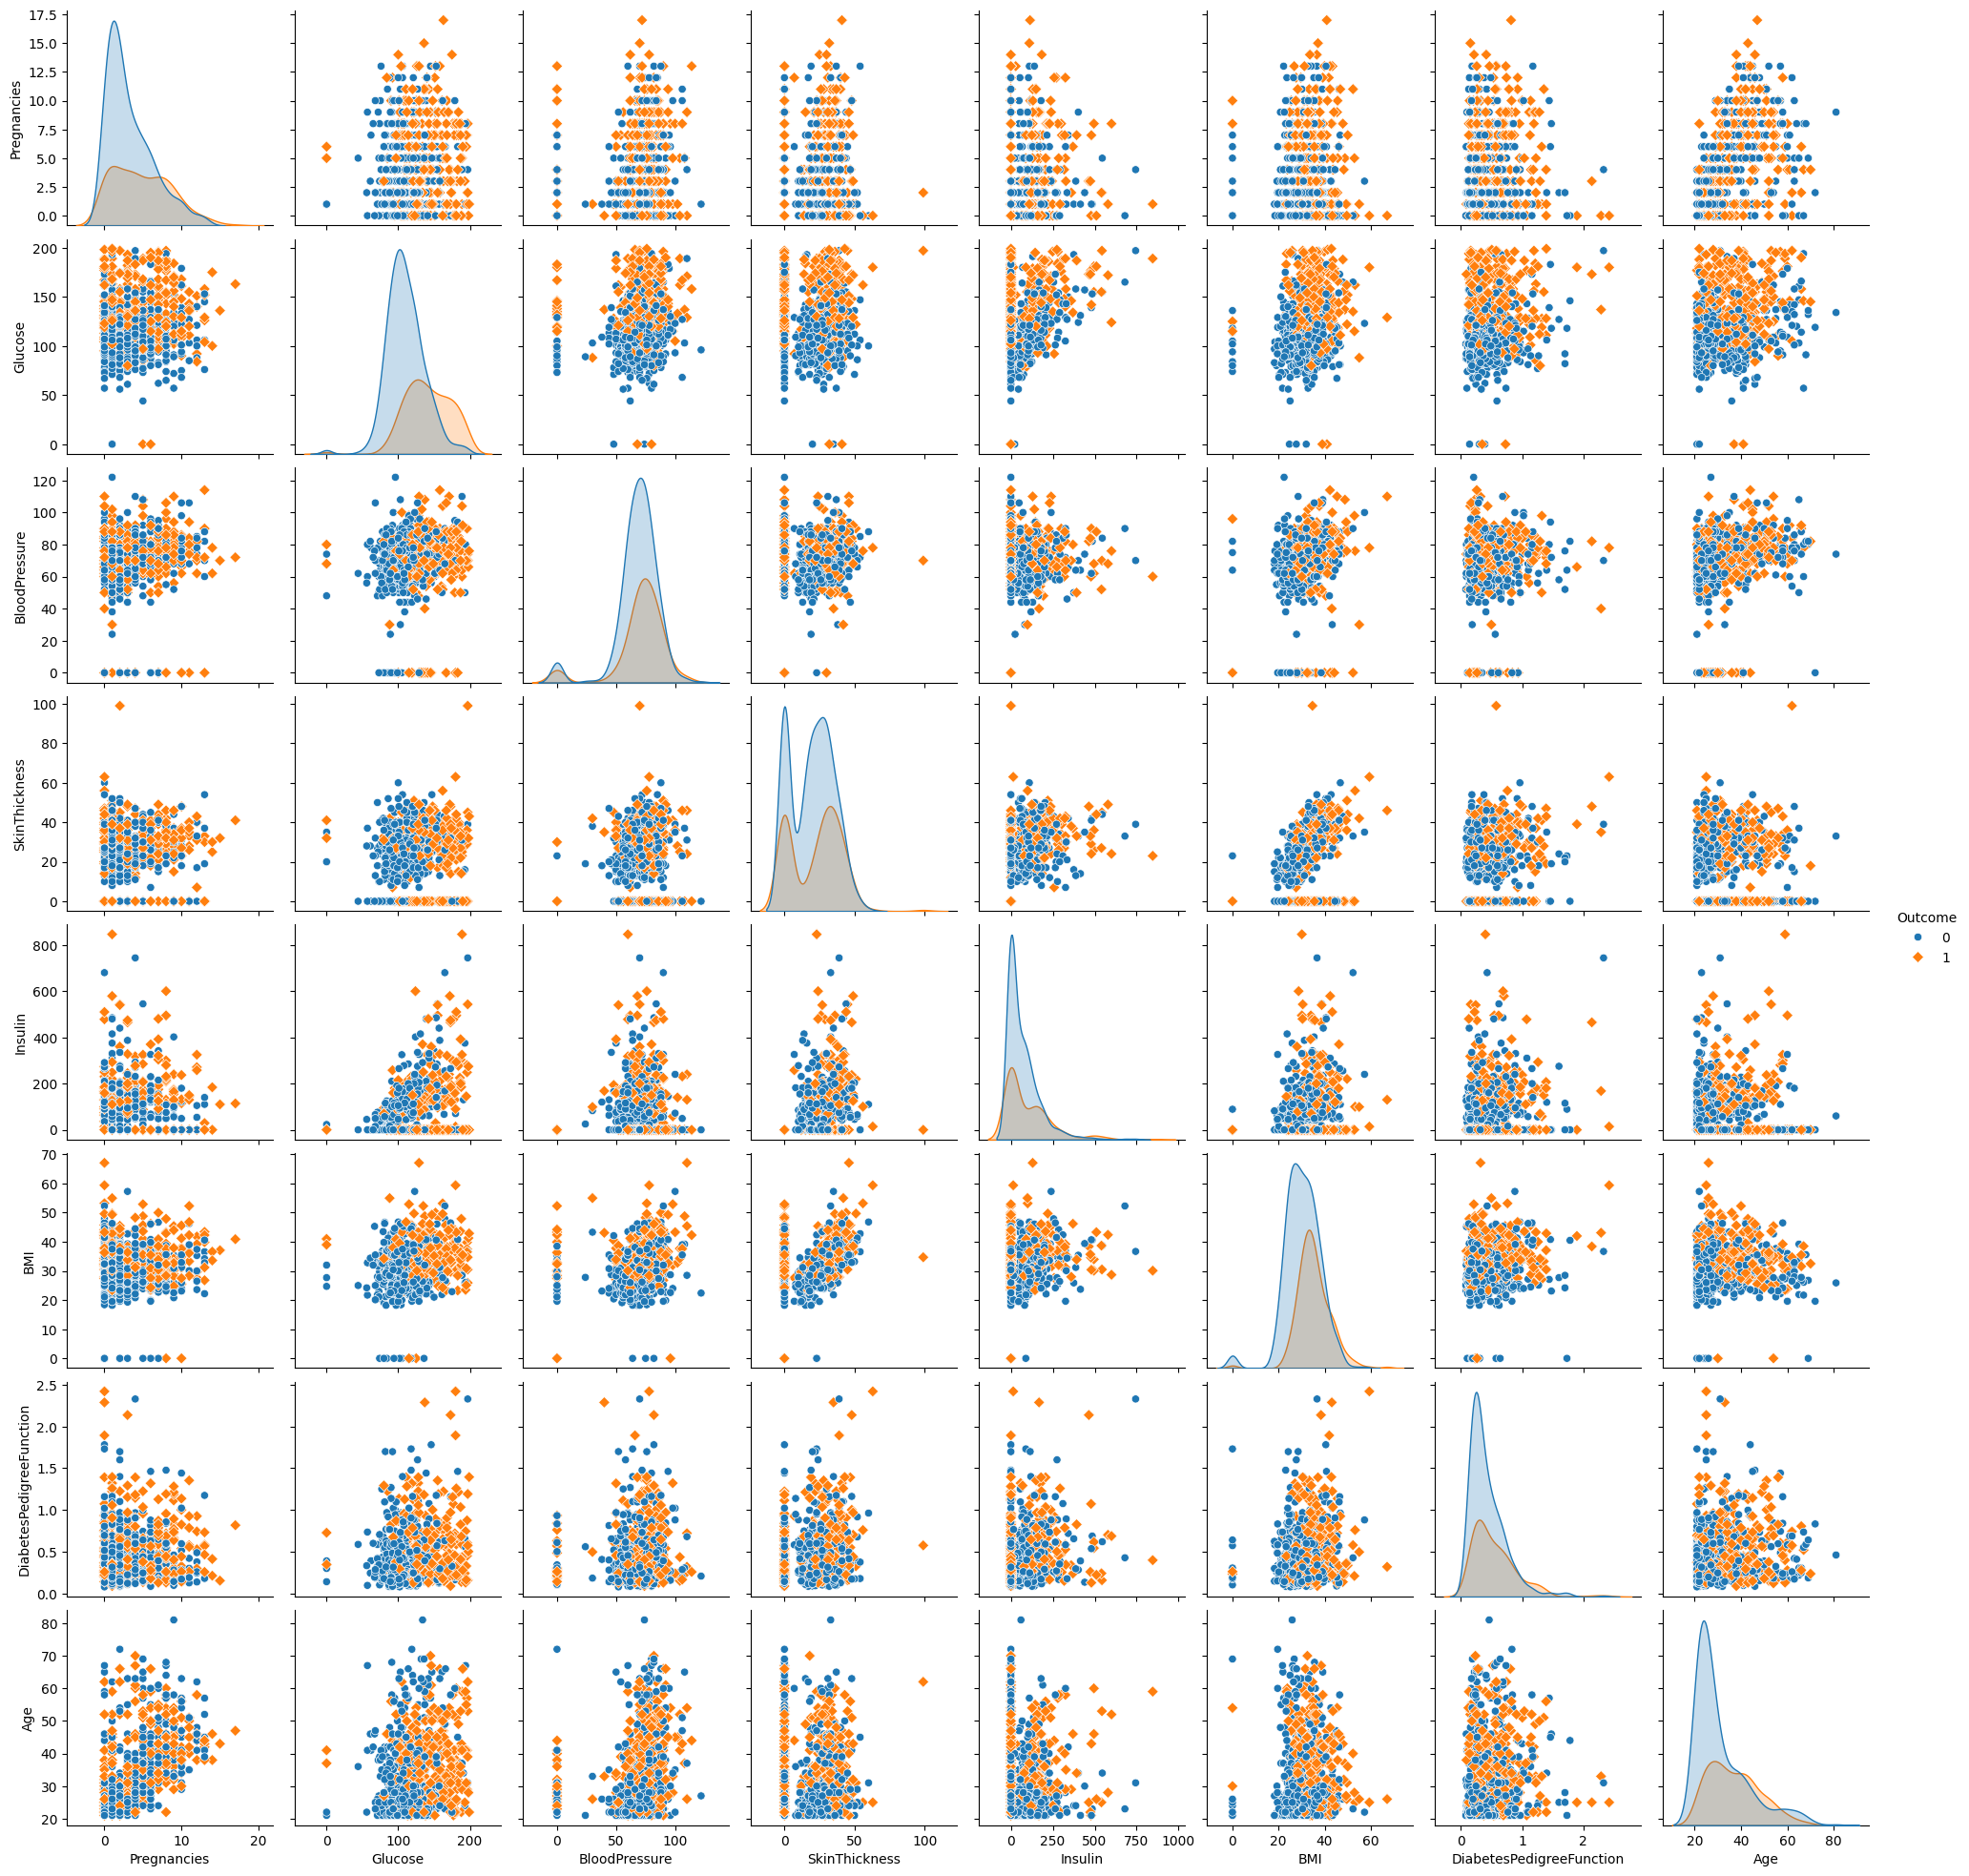

In [10]:
sns.pairplot(dataset, hue='Outcome', markers=['o', 'D'])

# 6. Splitting the Dataset
Split the dataset into training and test sets using a manual function.

In [11]:
def manual_train_test_split(X, y, test_size=0.2, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split_point = int(len(X) * (1 - test_size))
    train_idx = indices[:split_point]
    test_idx = indices[split_point:]

    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]

    return X_train, X_test, y_train, y_test

In [12]:
# Splitting the dataset in training and test dataset
X = dataset[dataset.columns[:-1]].values
y = dataset['Outcome'].values
X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_seed=42)

# 7. Mean-Based Classifier
Implement a simple classifier based on the mean of each class and evaluate its accuracy.

# Steps in Mean-Based Classification
<ul>
<li>Created a mean function to calculate mean</li>
<li>Split the training dataset into two classes</li>
<li>Calculated the mean of each class</li>
<li>Defined a predict function for classification using Euclidean distance</li>
<li>Predicted the output for the test dataset</li>
<li>Created a function to find the accuracy of the model</li>
</ul>

In [13]:
#function for calculating the mean
def mean(data):

    total_sum = 0
    for value in data:
        total_sum += value

    # Calculate the mean
    mean = total_sum / len(data)

    return mean

In [14]:
#Defining two Classes A and B
ClassA=X_train[y_train==0]
ClassB=X_train[y_train==1]

# Calculating the mean of each class
mean_classA = mean(ClassA)
mean_classB = mean(ClassB)

In [15]:
# predict function for calculating the euclidean distance from the mean for Classification
def predict(x, meanA, meanB):
    dist_ClassA = np.sqrt(np.sum((x - meanA) ** 2))
    dist_ClassB = np.sqrt(np.sum((x - meanB) ** 2))
    return 1 if dist_ClassA < dist_ClassB else 0

In [16]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [17]:
y_pred=np.array([predict(x, mean_classA, mean_classB) for x in X_test])

In [18]:
#5-fold Classification accuracy calculation
sum=0
for i in range(5):
  accuracy = np.mean(y_pred == y_test)
  sum=sum+accuracy
avgAcc=sum/5

print(f"Classification Accuracy is: {avgAcc*100:.2f}%")

Classification Accuracy is: 33.77%


# 8. Feature Selection
Apply forward and backward feature selection to identify the most relevant features for classification.

In [19]:
def forward_feature_selection(X_train, y_train, X_test, y_test):
    feature_count = X_train.shape[1]
    best_features = []
    best_perf = 0

    # Custom combinations generator (without itertools)
    def generate_combinations(n, r):
        def backtrack(start, path):
            if len(path) == r:
                result.append(path[:])
                return
            for i in range(start, n):
                path.append(i)
                backtrack(i + 1, path)
                path.pop()
        result = []
        backtrack(0, [])
        return result


    # Function to calculate performance of a given feature set
    def Perf(features):
        X_train_subset = X_train[:, features]
        X_test_subset = X_test[:, features]

        ClassA = X_train_subset[y_train == 1]
        ClassB = X_train_subset[y_train == 0]

        meanA = mean(ClassA)
        meanB = mean(ClassB)

        y_pred = np.array([predict(x, meanA, meanB) for x in X_test_subset])
        return np.mean(y_pred == y_test)

    # Try all combinations of feature sets (sizes 1 to feature_count)
    for r in range(1, feature_count + 1):
        combinations_r = generate_combinations(feature_count, r)
        for feature_subset in combinations_r:
            performance = Perf(feature_subset)
            print(f"Testing features {feature_subset} -> Accuracy: {performance*100:.2f}%")

            if performance > best_perf:
                best_perf = performance
                best_features = feature_subset

    return best_features, best_perf


In [20]:
selected_features, best_performance = forward_feature_selection(X_train, y_train, X_test, y_test)
print(f"Forward features with Best Accuracy: {selected_features}, {best_performance*100:.2f}%")

Testing features [0] -> Accuracy: 63.64%
Testing features [1] -> Accuracy: 70.13%
Testing features [2] -> Accuracy: 54.55%
Testing features [3] -> Accuracy: 50.65%
Testing features [4] -> Accuracy: 62.99%
Testing features [5] -> Accuracy: 64.29%
Testing features [6] -> Accuracy: 57.79%
Testing features [7] -> Accuracy: 66.88%
Testing features [0, 1] -> Accuracy: 70.13%
Testing features [0, 2] -> Accuracy: 57.14%
Testing features [0, 3] -> Accuracy: 51.30%
Testing features [0, 4] -> Accuracy: 62.99%
Testing features [0, 5] -> Accuracy: 64.94%
Testing features [0, 6] -> Accuracy: 63.64%
Testing features [0, 7] -> Accuracy: 67.53%
Testing features [1, 2] -> Accuracy: 70.78%
Testing features [1, 3] -> Accuracy: 70.13%
Testing features [1, 4] -> Accuracy: 66.23%
Testing features [1, 5] -> Accuracy: 70.78%
Testing features [1, 6] -> Accuracy: 70.13%
Testing features [1, 7] -> Accuracy: 72.08%
Testing features [2, 3] -> Accuracy: 51.30%
Testing features [2, 4] -> Accuracy: 62.99%
Testing feat

In [21]:
def backward_feature_selection(X_train, Y_train, X_test, Y_test, min_features=1):
    feature_count = X_train.shape[1]
    best_features = []
    best_perf = 0

    # Custom combinations generator (no itertools)
    def generate_combinations(n, r):
        def backtrack(start, path):
            if len(path) == r:
                result.append(path[:])
                return
            for i in range(start, n):
                path.append(i)
                backtrack(i + 1, path)
                path.pop()
        result = []
        backtrack(0, [])
        return result

    # Performance function
    def Perf(features):
        X_train_subset = X_train[:, features]
        X_test_subset = X_test[:, features]

        ClassA = X_train_subset[Y_train == 1]
        ClassB = X_train_subset[Y_train == 0]

        meanA = mean(ClassA)
        meanB = mean(ClassB)

        y_pred = np.array([predict(x, meanA, meanB) for x in X_test_subset])
        return np.mean(y_pred == Y_test)

    # Try all combinations from full set down to min_features
    for r in range(feature_count, min_features - 1, -1):
        combinations_r = generate_combinations(feature_count, r)
        for feature_subset in combinations_r:
            performance = Perf(feature_subset)
            print(f"Testing features {feature_subset} -> Accuracy: {performance*100:.2f}%")

            if performance > best_perf:
                best_perf = performance
                best_features = feature_subset

    return list(best_features), best_perf


In [22]:
selected_features, final_accuracy = backward_feature_selection(X_train, y_train, X_test, y_test)
print(f"Backward-selected features: {selected_features}, Final Accuracy: {final_accuracy*100:.2f}%")

Testing features [0, 1, 2, 3, 4, 5, 6, 7] -> Accuracy: 66.23%
Testing features [0, 1, 2, 3, 4, 5, 6] -> Accuracy: 66.23%
Testing features [0, 1, 2, 3, 4, 5, 7] -> Accuracy: 66.23%
Testing features [0, 1, 2, 3, 4, 6, 7] -> Accuracy: 66.23%
Testing features [0, 1, 2, 3, 5, 6, 7] -> Accuracy: 71.43%
Testing features [0, 1, 2, 4, 5, 6, 7] -> Accuracy: 66.23%
Testing features [0, 1, 3, 4, 5, 6, 7] -> Accuracy: 66.23%
Testing features [0, 2, 3, 4, 5, 6, 7] -> Accuracy: 63.64%
Testing features [1, 2, 3, 4, 5, 6, 7] -> Accuracy: 66.23%
Testing features [0, 1, 2, 3, 4, 5] -> Accuracy: 66.23%
Testing features [0, 1, 2, 3, 4, 6] -> Accuracy: 66.23%
Testing features [0, 1, 2, 3, 4, 7] -> Accuracy: 66.23%
Testing features [0, 1, 2, 3, 5, 6] -> Accuracy: 71.43%
Testing features [0, 1, 2, 3, 5, 7] -> Accuracy: 71.43%
Testing features [0, 1, 2, 3, 6, 7] -> Accuracy: 70.78%
Testing features [0, 1, 2, 4, 5, 6] -> Accuracy: 66.23%
Testing features [0, 1, 2, 4, 5, 7] -> Accuracy: 66.23%
Testing features [